In [1]:
from torchvision import datasets, transforms
import torch

# 데이터 세트
train_ds = datasets.MNIST(root='data', train=True, transform=transforms.ToTensor(), download=True)
test_ds  = datasets.MNIST(root='data', train=False, transform=transforms.ToTensor(), download=True)

# 데이터 로더
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=64, shuffle=True)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=64, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5622160.91it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 94557.55it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1567102.52it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3313135.44it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [2]:
# 데이터 로더에서 이미지를 1장만 로딩합니다.
images, labels = next(iter(train_dl))
images.shape

# 흑백 이미지라 채널 갯수 1임

torch.Size([64, 1, 28, 28])

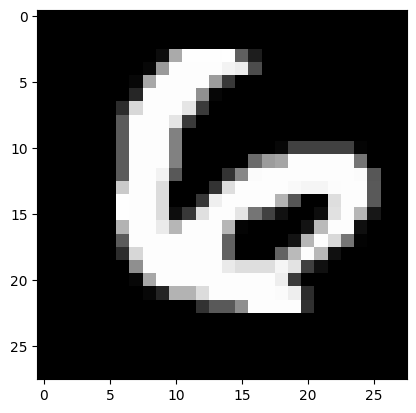

In [3]:
# 첫 번째 이미지만 시각화 합니다.
import matplotlib.pyplot as plt
plt.imshow(images[0].squeeze(), cmap='gray')
plt.show()

# Conv2D 레이어 사용하기

In [5]:
import torch.nn as nn

conv_layer = nn.Conv2d(
    in_channels = 1, # 입력 이미지 (input feature map)의 채널
    out_channels= 5, # 출력 이미지 (output feature map)의 채널 -> 필터의 갯수
    kernel_size = 3
)

conv_layer

Conv2d(1, 5, kernel_size=(3, 3), stride=(1, 1))

In [6]:
# Linear 형식은 N X M(N, M) 형식으로 입력하는 것처럼, CNN(N, C, H, W) 형식으로 입력

input_image = images[:1, :, :, :] # 배치, 채널, 높이, 너비
input_image.shape

torch.Size([1, 1, 28, 28])

In [7]:
conv_out = conv_layer(input_image)
conv_out.shape

torch.Size([1, 5, 26, 26])

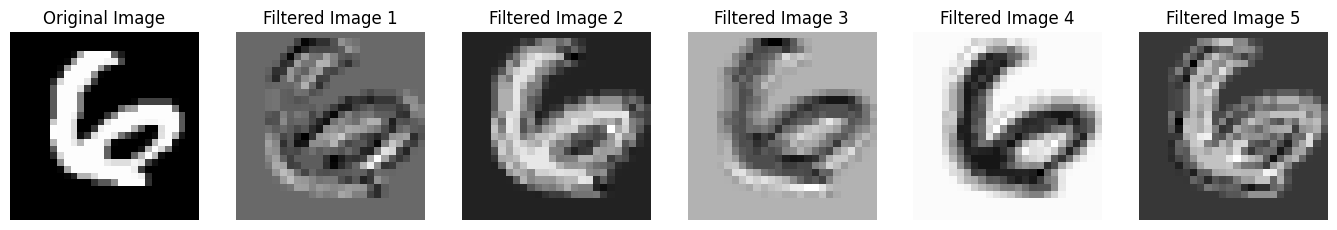

In [8]:
# conv 레이어를 지나간 각 이미지를 시각화 합니다.
conv_out_images = conv_out[0]

fig, axes = plt.subplots(1, 6, figsize=(17, 3))

axes[0].imshow(images[0, ...].squeeze(), cmap='gray')
axes[0].title.set_text('Original Image')
axes[0].axis('off')

for idx, ax in enumerate(axes[1:]):
    ax.imshow(conv_out_images[idx, ...].detach().squeeze(), cmap='gray')
    ax.axis('off')
    ax.title.set_text(f'Filtered Image {idx+1}')
plt.show()

## Filter 시각화

In [9]:
filters = conv_layer.weight
filters.shape # (C_out, C_in, H_k, W_k)

torch.Size([5, 1, 3, 3])

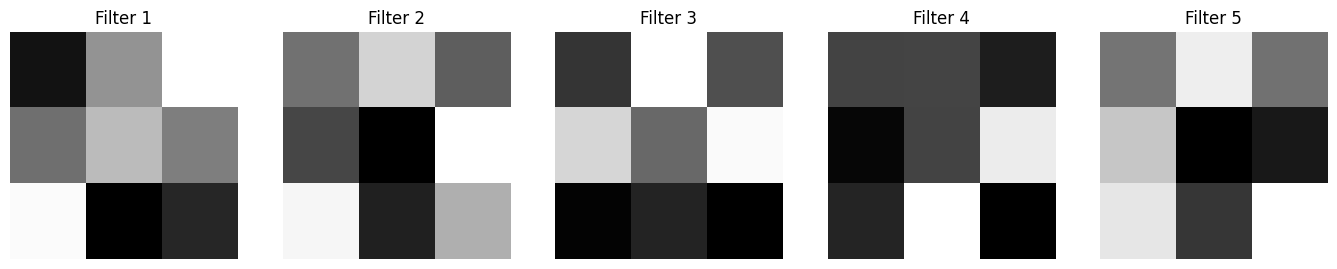

In [10]:
# 시각화
fig, axes = plt.subplots(1, 5, figsize=(17, 3))

for idx, ax in enumerate(axes):
    ax.imshow(filters[idx, 0, ...].detach().squeeze(), cmap='gray')
    ax.title.set_text(f'Filter {idx+1}')
    ax.axis('off')
plt.show()